In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import requests
import zipfile
from io import BytesIO

In [25]:
def getZIP(zipFileName):
    r = requests.get(zipFileName).content
    s = BytesIO(r)
    zf = zipfile.ZipFile(s,'r')
    return zf

In [26]:
url = 'http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip'
zf = getZIP(url)
print(zf.namelist())

['SchoolsPlayers.csv', 'SeriesPost.csv', 'Teams.csv', 'TeamsFranchises.csv', 'TeamsHalf.csv', 'AllstarFull.csv', 'Appearances.csv', 'AwardsManagers.csv', 'AwardsPlayers.csv', 'AwardsShareManagers.csv', 'AwardsSharePlayers.csv', 'Batting.csv', 'BattingPost.csv', 'Fielding.csv', 'FieldingOF.csv', 'FieldingPost.csv', 'HallOfFame.csv', 'Managers.csv', 'ManagersHalf.csv', 'Master.csv', 'Pitching.csv', 'PitchingPost.csv', 'readme2013.txt', 'Salaries.csv', 'Schools.csv']


In [28]:
tablenames = zf.namelist()

In [35]:
salaries = pd.read_csv(zf.open('Salaries.csv'))
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,murraed02,1472819
1,1985,BAL,AL,lynnfr01,1090000
2,1985,BAL,AL,ripkeca01,800000
3,1985,BAL,AL,lacyle01,725000
4,1985,BAL,AL,flanami01,641667


In [53]:
teams = pd.read_csv(zf.open('Teams.csv'))
teams = teams[['yearID','teamID','W']]
teams.head()

,yearID,teamID,W
0,1871,PH1,21
1,1871,CH1,19
2,1871,BS1,20
3,1871,WS3,15
4,1871,NY2,16


In [54]:
salsum = salaries.groupby(['yearID','teamID'],as_index=False).sum()
salsum.head()

,yearID,teamID,salary
0,1985,ATL,14807000
1,1985,BAL,11560712
2,1985,BOS,10897560
3,1985,CAL,14427894
4,1985,CHA,9846178


In [56]:
newdf = pd.merge(teams,salsum,how='inner',on=['yearID','teamID'])
newdf.head()

,yearID,teamID,W,salary
0,1985,TOR,99,8812550
1,1985,NYA,97,14238204
2,1985,DET,84,10348143
3,1985,BAL,83,11560712
4,1985,BOS,81,10897560


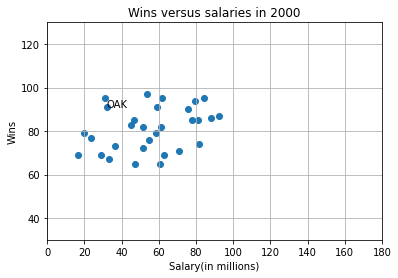

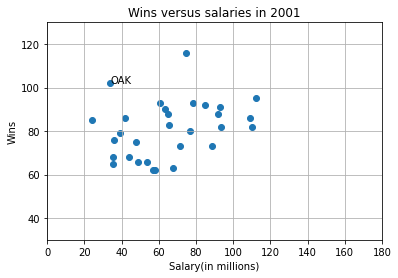

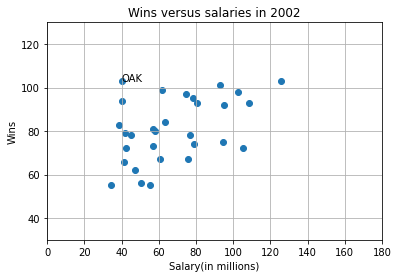

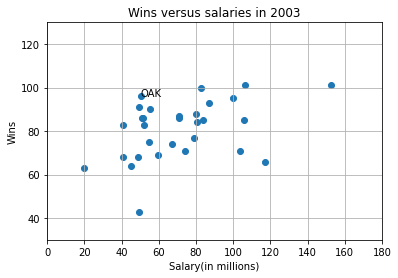

In [86]:
tname = 'OAK'
years = np.arange(2000,2004)

for y in years:
    df = newdf[newdf["yearID"]==y]
    plt.scatter(df['salary']/1e6,df['W'])
    plt.title("Wins versus salaries in "+str(y))
    plt.xlabel("Salary(in millions)")
    plt.ylabel("Wins")
    plt.xlim(0,180)
    plt.ylim(30,130)
    plt.grid()
    plt.annotate(tname,xy=(df['salary'][df['teamID']== tname]/1e6,df['W'][df['teamID']==tname]),
               )
    plt.show()

<ipython-input-108-9af9c5bca627>:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w = np.linalg.lstsq(features.T,labels)[0]


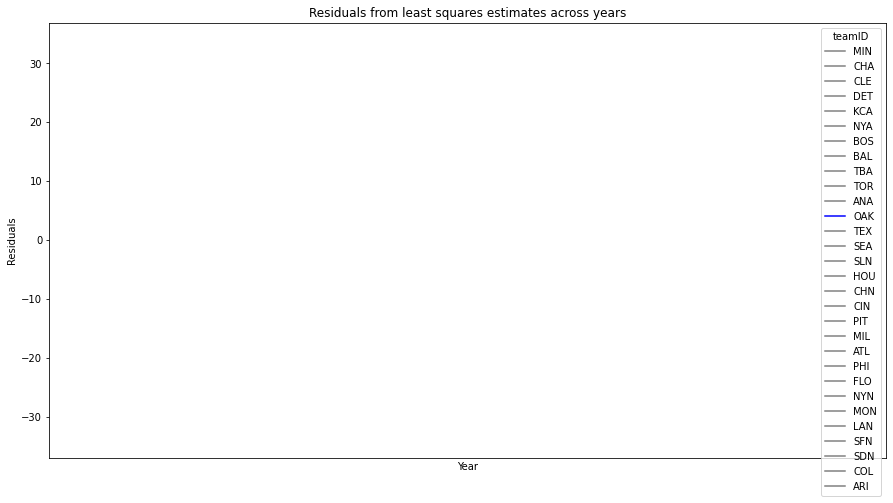

In [108]:
years = np.arange(1999,2005)
residData = pd.DataFrame()
for y in years:
    df = newdf[newdf['yearID'] == y]
    x_list = df['salary'].values / 1e6
    y_list = df['W'].values
    
    features = np.array([x_list,np.ones(len(x_list))])
    labels = y_list
    w = np.linalg.lstsq(features.T,labels)[0]
    pred = w[0]*x_list + w[1]
    residData[y] = labels - pred
residData.index = df['teamID']
residData = residData.T
residData.index = residData.index.format()

residData.plot(title = 'Residuals from least squares estimates across years', figsize = (15, 8),
               color=map(lambda x: 'blue' if x=='OAK' else 'gray',df.teamID))
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.xlim(1999,2004)
plt.show(